# Credit card fraud classifier

Classifying anonymized credit card fraud transactions dataset from kaggle: https://www.kaggle.com/dalpozz/creditcardfraud

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout

%matplotlib inline

### You can tweak these settings as you like:

In [71]:
train_size = 0.8
batch_size = 10
state_size = 64
num_features = 30
num_classes = 1
dropout = 0.5
learning_rate = 0.001
epochs = 50              #

### Read data from csv and get train and test data length:
dataset is already balanced, so no need to do that.

In [72]:
csv_file_path = "data/creditcard_sampled.csv"

dataset = pd.read_csv(csv_file_path)
train_length = int(len(dataset.index) * train_size)
test_length = int(len(dataset.index) * (1.0 - train_size))

### Used features from csv:

In [73]:
features = [
            "Time","V1","V2","V3","V4","V5","V6","V7","V8","V9",
            "V10","V11","V12","V13","V14","V15","V16","V17","V18",
            "V19","V20","V21","V22","V23","V24","V25","V26","V27",
            "V28","Amount",
            ]

### Normalize dataset and split train/test data:

In [74]:
dataset_norm = (dataset - dataset.min()) / (dataset.max() - dataset.min())
dataset_norm = dataset_norm.sample(frac=1)
dataset_train = dataset_norm[dataset.index < train_length]
dataset_test = dataset_norm[dataset.index >= train_length]

x_train = dataset_train[features].as_matrix()
y_train = dataset_train[["Class"]].as_matrix()
x_test = dataset_test[features].as_matrix()
y_test = dataset_test[["Class"]].as_matrix()

### Reshape data:

In [75]:
x_train = x_train[:-(len(x_train) % num_features)].reshape([-1, num_features])
y_train = y_train[:-(len(y_train) % num_features)].reshape([-1, num_classes])
x_test = x_test[:-(len(x_test) % num_features)].reshape([-1, num_features])
y_test = y_test[:-(len(y_test) % num_features)].reshape([-1, num_classes])

### Define and compile model:

In [76]:
model = Sequential()
model.add(Dense(state_size, input_dim=num_features, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(state_size, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train model:

In [77]:
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/50
780/780 [==============================] - 0s - loss: 0.6441 - acc: 0.6397     
Epoch 2/50
780/780 [==============================] - 0s - loss: 0.5452 - acc: 0.7795     
Epoch 3/50
780/780 [==============================] - 0s - loss: 0.4303 - acc: 0.8359     
Epoch 4/50
780/780 [==============================] - 0s - loss: 0.3493 - acc: 0.8615     
Epoch 5/50
780/780 [==============================] - 0s - loss: 0.3006 - acc: 0.8987     
Epoch 6/50
780/780 [==============================] - 0s - loss: 0.2568 - acc: 0.9103     
Epoch 7/50
780/780 [==============================] - 0s - loss: 0.2310 - acc: 0.9231     
Epoch 8/50
780/780 [==============================] - 0s - loss: 0.2168 - acc: 0.9359     
Epoch 9/50
780/780 [==============================] - 0s - loss: 0.2175 - acc: 0.9372     
Epoch 10/50
780/780 [==============================] - 0s - loss: 0.1858 - acc: 0.9410     
Epoch 11/50
780/780 [==============================] - 0s - loss: 0.1964 - acc: 0.9346   

### Evaluate model:

In [78]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nAccuracy: {0:.2f} % ".format(score[1] * 100))

 10/180 [>.............................] - ETA: 1s
Accuracy: 96.67 % 


### Show predicted values:

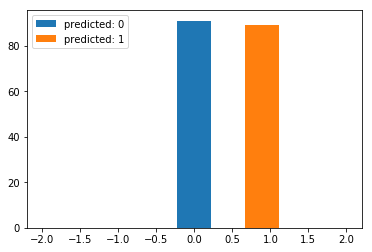

In [79]:
preds = list(map(lambda x: int(round(x[0])), model.predict(x_test)))
x = [0] * preds.count(0)
y = [1] * preds.count(1)

bins = np.linspace(-2, 2, 10)
plt.hist(x, bins, alpha=1, label='predicted: 0')
plt.hist(y, bins, alpha=1, label='predicted: 1')
plt.legend(loc='upper left')
plt.show()